# ET Example



In [2]:
import os
import time
import h5py
import matplotlib.pyplot as plt
import numpy as np

from sgvb_psd.optimal_psd_estimator import OptimalPSDEstimator

2024-09-16 18:13:07.608617: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


18:13:13|SGVB-PSD|INFO| 0s |No GPU detected. Running on CPU.


In [3]:
HERE = os.path.dirname(os.path.abspath('.'))


data = {}
with h5py.File(os.path.join(HERE, "data/et_data.h5"), "r") as h5_file:
    for c in "XYZ":
        data[c] = h5_file[c][:]
    data['t'] = h5_file['time'][:]
    
x = np.array([data['X'], data['Y'], data['Z']]).T

In [25]:
from sgvb_psd.utils.periodogram import get_periodogram
from sgvb_psd.postproc.plot_psd import plot_peridogram

dt = data['t'][1] - data['t'][0]
fs = 1/dt
# scaling = 10.0 ** 23
scaling = 1
Pxx, f = get_periodogram(x, fs=fs, nperseg=256, noverlap=128, psd_scaling=scaling)

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

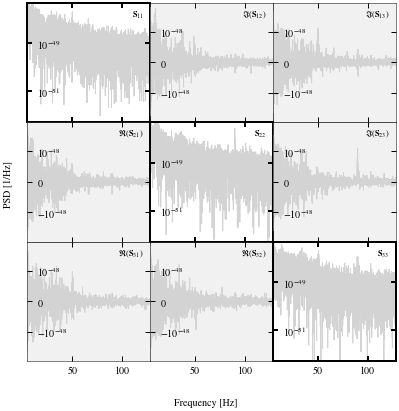

In [26]:

plot_peridogram(
    Pxx, f, 
    xlims=(5, 128),
    diag_ylims=(5e-53, 5e-48),
    offdiag_ylims=(10e-53, 10e-48),
    sylmog_thresh=10e-49
)

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

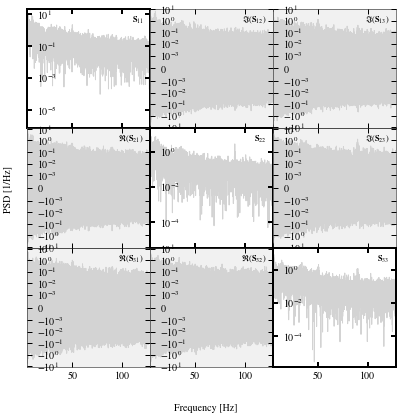

In [27]:
plot_peridogram(
    Pxx/10e-49, f, 
    xlims=(5, 128),
    # diag_ylims=(5e-53, 5e-48),
    # offdiag_ylims=(10e-53, 10e-48),
    # sylmog_thresh=10e-49
)

In [28]:
optim = OptimalPSDEstimator(
    x=x/10e-49, 
    N_theta=400, 
    nchunks=1, 
    duration=data['t'][-1],
    ntrain_map=100, 
    N_samples=100,
    max_hyperparm_eval=1,
)
optim.run()

18:42:44|SGVB-PSD|INFO| 1770s |Running hyperopt to find optimal learning rate
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]18:42:44|SGVB-PSD|DEBUG| 1770s |Inputted data shape: (65536, 3)
18:42:46|SGVB-PSD|DEBUG| 1772s |Starting Model Inference Training..
18:42:46|SGVB-PSD|DEBUG| 1772s |Start Point Estimating... 
18:42:52|SGVB-PSD|DEBUG| 1778s |MAP Training Time: 6.05s
18:42:52|SGVB-PSD|DEBUG| 1778s |Start UQ training... 
18:43:34|SGVB-PSD|DEBUG| 1820s |VI Time: 42.16s
18:43:34|SGVB-PSD|DEBUG| 1820s |Total Inference Training Time: 48.32s
100%|██████████| 1/1 [00:52<00:00, 52.00s/trial, best loss=?]
18:43:36|SGVB-PSD|ERROR| 1822s |Hyperopt failed to find optimal learning rate: . Using last value tested.
18:43:36|SGVB-PSD|INFO| 1822s |Optimal learning rate found in 52.01s
18:43:36|SGVB-PSD|INFO| 1822s |Computing optimal PSD estimation
18:44:01|SGVB-PSD|INFO| 1847s |Optimal PSD estimation complete in 24.60s


(array([[[[nan+nanj, nan+nanj, nan+nanj],
          [nan+nanj, nan+nanj, nan+nanj],
          [nan+nanj, nan+nanj, nan+nanj]],
 
         [[nan+nanj, nan+nanj, nan+nanj],
          [nan+nanj, nan+nanj, nan+nanj],
          [nan+nanj, nan+nanj, nan+nanj]],
 
         [[nan+nanj, nan+nanj, nan+nanj],
          [nan+nanj, nan+nanj, nan+nanj],
          [nan+nanj, nan+nanj, nan+nanj]],
 
         ...,
 
         [[nan+nanj, nan+nanj, nan+nanj],
          [nan+nanj, nan+nanj, nan+nanj],
          [nan+nanj, nan+nanj, nan+nanj]],
 
         [[nan+nanj, nan+nanj, nan+nanj],
          [nan+nanj, nan+nanj, nan+nanj],
          [nan+nanj, nan+nanj, nan+nanj]],
 
         [[nan+nanj, nan+nanj, nan+nanj],
          [nan+nanj, nan+nanj, nan+nanj],
          [nan+nanj, nan+nanj, nan+nanj]]],
 
 
        [[[nan+nanj, nan+nanj, nan+nanj],
          [nan+nanj, nan+nanj, nan+nanj],
          [nan+nanj, nan+nanj, nan+nanj]],
 
         [[nan+nanj, nan+nanj, nan+nanj],
          [nan+nanj, nan+nanj, nan+n

In [9]:
optim.all_samp

[[<tf.Tensor: shape=(500, 3, 402), dtype=float32, numpy=
  array([[[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],
  
         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],
  
         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],
  
         ...,
  
         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],
  
         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],
  
         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)>,
  <tf.Tensor: shape=(500, 3, 400), dtype=